<a href="https://colab.research.google.com/github/leilaneanjos/Analise_de_Sistemas_Lineares/blob/main/ASL2_An%C3%A1lise_do_Dom%C3%ADnio_do_Tempo_de_Sistemas_em_Tempo_Cont%C3%ADnuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Sistemas Lineares**
#  2 Análise do Domínio do Tempo de Sistemas em Tempo Contínuo
Para analise do domínio do tempo de sistemas lineares contínuos invariantes no tempo (LCIT), foi considerado sistemas lineares diferenciais onde a saída e a entrada do sistema estão relacionadas por equações diferenciais ordinárias. Com o objetivo de ensinar como a linguagem Python trabalha com esse tipo de informação veremos:

- Resposta do sistema a condições internas: Resposta de entrada nula;
- Resposta do sistemas a entrada externa: Resposta de estado nulo.



# **Biblioteca:**
Inicialmente se faz necessário a importação da biblioteca `sympy` , sendo ela a base para a construção dos códigos. Uma fonte importante para aprender `sympy` é na sua [página de documentação](https://docs.sympy.org/latest/index.html).

In [ ]:
import sympy as sp

#  **2-1 Resposta do sistema a condições internas: Resposta de entrada nula.**

A resposta de entrada nula $y_0(t)$ é solução quando a entrada $x(t)=0$. Vale resaltar que dependendo da equação diferencial apresentada a resposta de entrada nula $y_0(t)$ pode apresentar:
 - Raizes Distintas ($\lambda_1 \neq \lambda_2$);
 - Raizes Iguais ($\lambda_1 = \lambda_2$);
 - Raizes Complexas ($\lambda_1= \alpha + j\beta; \lambda_2=\alpha - j\beta $).





 

Para raizes características distintas tomemos como exemplo 1 o seguinte problema:

# **Exemplo 1:**

Determine $y_0(t)$, a componente de entrada nula da resposta de um sistema LCIT descrito pela seguinte equação diferencial:

$$ \frac{d^2y}{dt^2}+3\frac{dy}{dt}+2y(t)= \frac{dx}{dt}$$

Para resolver este problema utilizando a linguagem python, teremos que:
- Determinar a variável $t$ utilizando o arquivo `sp.symbols(' ')`;
- Determinar a função $y(t)$ utilizando o arquivo `sp.Function(" ")`;
- Definir a equação a partir do arquivo `sp.Eq()`;
- Utilizar o arquivo `sp.dsolve()` para resolver a equação para $y(t)$;
- Utilizar o arquivo `sp.expand()` para expandi a função encontrada caso seja necessário.

Determinando a variável $t$

In [ ]:
t = sp.symbols('t')

Utilizando o arquivo `sp.Function(" ")` da biblioteca `sympy` para fazer com que y deixe de ser uma condição de atribuição e passe a se tornar uma função que depende de uma variável 

In [ ]:
y = sp.Function("y")

`sp.Eq()` irá permitir criar uma equação, onde em seu argumento teremos:
- A equação que desejamos expressar;
- E o valor em que a equação é igualada.

Como no exemplo a equação se trata da soma de derivadas utilizamos o arquivo da biblioteca `sympy` denominada `sp.diff()` onde em seu argumento ,no modelo formal, temos:
- A função que desejamos derivar;
- A  variável que determina em função de que estamos derivando;
- A ordem da derivada.
 
 Expressando em forma de código temos: 
 - `sp.diff(y(t), t, 1)` 
 
 Mas vale ressaltar que há outras maneiras de expressar `sp.diff()`, como por exemplo:
 - `y(t).diff(t)` para primeira ordem; 
 - `y(t).diff(t,t)` para segunda ordem;
 - `y(t).diff(t, 1)` ou  `y(t).diff(t, 2)` sendo estas outras formas de definir a ordem da derivada. 

In [ ]:
equa =  sp.Eq(y(t).diff(t,t)+3*y(t).diff(t)+2*y(t), 0)
equa

Eq(2*y(t) + 3*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)

Já definida a equação diferencial basta resolvê-la, para isso utiliza-se o arquivo `sp.dsolve()` onde ela tem por objetivo resolver equações diferenciais ordinárias para uma determinada função, logo em seu argumento teremos a equação diferencial (equa) e a função y(t)



In [ ]:
saida = sp.dsolve(equa, y(t))
saida

Eq(y(t), (C1 + C2*exp(-t))*exp(-t))

As vezes para uma melhor vizualização da equação utiliza-se o arquivo `sp.expand()`, onde dentro do seu argumento temos a equação que desejamos expandir. Um outro modelo menos formal de expressar esse trecho de código seria por `saida.expand()`, onde a saida representa uma condição de atribuição onde equação estar guardada.

In [ ]:
saida = sp.expand(saida)
saida

Eq(y(t), C1*exp(-t) + C2*exp(-2*t))

Feito todos os procedimento citados no início do exemplo 1 foi-se possivél encontrar $y_0$, mas se analisarmos o resultado é de fácil percepção a presença de duas contantes $C_1$ e $C_2$, para determinar essas constantes se faz necessário determinar as condições iniciais. Logo para a equação do exemplo 1 quando $y_0(0)=0$ e $y'_0(0)=-5$, teremos:

In [ ]:
saida = sp.dsolve(equa, y(t), ics = {y(0):0, y(t).diff(t).subs(t, 0):-5})
saida = sp.expand(saida)
saida

Eq(y(t), -5*exp(-t) + 5*exp(-2*t))

Observe que a única mudança feita foi no argumento do arquivo `sp.dsolve()`, pois uma vez que é definido condições inicias para $y_0$ existe um subcomando deste arquivo chamado `ics` que justamente trata sobre condições iniciais para EDO's. Sendo que o argumento deste subcomando está contido dentro de chaves.

Analisando o argumento do subcomando `ics`, temos:
- 1ª argumento: `y(0):0`, entende-se que para o resultado encontrado quando $t=0$, $ y=0$;
- 2ª argumento: `y(t).diff(t).subs(t, 0):-5}`, entende-se como quando a derivada de primeira ordem for aplicada ao resultado encontrado substitua no lugar de t o valor 0 que por consequência irá fazer com que $y$ seja igual a -5.

A capacidade de fazer essa substituição é dada pelo arquivo `sp.subs()`, mas a forma como ele aparece no código é em seu modelo não-formal.Depois se aplica `sp.expand()` para melhor análise da equação.   

Para raizes características iguais temos: 

# **Exemplo 2:** 

$$ \frac{d^2y(t)}{dt^2}+6\frac{dy(t)}{dt}+9y(t)= (3\frac{dx(t)}{dt}+5)x(t)$$

Tendo como condições inicias $y_0(0)=3$ e $y_0'(0)=-7$



In [ ]:
equa =  sp.Eq(y(t).diff(t,t)+6*y(t).diff(t)+9*y(t), 0)
equa

Eq(9*y(t) + 6*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)

In [ ]:
saida = sp.dsolve(equa, y(t), ics = {y(0):3, y(t).diff(t).subs(t, 0):-7})
saida = saida.expand()
saida

Eq(y(t), 2*t*exp(-3*t) + 3*exp(-3*t))

Para raizes características complexas temos:
# **Exemplo 3:** 

$$ \frac{d^2y(t)}{dt^2}+4\frac{dy(t)}{dt}+40y(t)= (\frac{dx(t)}{dt}+2)x(t)$$

Tendo como condições inicias $y_0(0)=2$ e $y_0'(0)=16.78$

In [ ]:
equa =  sp.Eq(y(t).diff(t,t)+4*y(t).diff(t)+40*y(t), 0)
equa


Eq(40*y(t) + 4*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)

In [ ]:
saida = sp.dsolve(equa, y(t), ics = {y(0):2, y(t).diff(t).subs(t, 0):16.78})
saida

Eq(y(t), (3.46333333333333*sin(6*t) + 2.0*cos(6*t))*exp(-2*t))

Quando trabalhamos com números irracionais utilizando a biblioteca `sympy` devemos nos atentar ao padrão de avaliação numérica, onde para essa biblioteca essa avaliação é realizada com a precisão de 15 dígitos decimais. Visualmente para um resultado final, dependendo do tipo de trabalho que esteja sendo realizado, não se torna agravedavel de ver tantos dígitos. 

Para aplicar uma precisão desejada em seu resultado se faz uso do arquivo `.evalf()`, onde em seu argumento irá ir a quantidade de digitos decimais que deseja trabalhar.

In [ ]:
saida = sp.dsolve(equa, y(t), ics = {y(0):2, y(t).diff(t).subs(t, 0):16.78}).evalf(3)
saida

Eq(y(t), (3.46*sin(6*t) + 2.0*cos(6*t))*exp(-2*t))

# **2-2 Resposta do sistema á entrada Externa : Resposta de estado nulo**

A resposta de estado nulo é obtido a partir da *integral de convolução*, onde para um sistema **LCIT** ela é definida por:
$$y(t)= x(t)h(t-\tau) = \int_{0}^{t} x(\tau)h(t-\tau) d\tau$$
# **Exemplo 1:**

Para um sistema **LCIT** com resposta ao impulso unitário dada por $h(t)= e^{-2t}u(t)$. Determine a resposta $y(t)$ para a entrada $x(t)= e^{-t}u(t)$

No intuitor de resolver esse exmplo iremos seguir os seguinte passos:
- Determinar a variável $\tau$ e $t$ utilizando `sp.symbols`;
- Determinar a entrada $x(t)$ e o impulso unitário $h(t)$ em `sympy`;
- Utilizar `sp.subs()` para colocar $x(t)$ e $h(t-\tau)$ em função da variável dependente $\tau$;
- Utilizar `sp.integrate()` para realizar a integral de convolução. Por se tratar de uma integral definida em seu argumento irá a função que se deseja integrar, a variável que representa em função de que estamos integrando e os limites de integração;
- Utilizar `sp.expand()` expandir a resposta $y(t)$ e posteriormente `sp.collect()` para colocar um termo em evidência. 


Determinando $\tau$ e $t$: 

In [ ]:
tau= sp.symbols ('tau')
t = sp.symbols('t', positive = True)

Ao declararmos a variável $t$ foi colocado um subcomando afirmando que t é positivo, como temos tanto na entrada $x(t)$ quando no impulso unitário $h(t)$ um degrau sendo multiplicado ao afirmamos que t é positivo por definição o degrau passa a ser 1. 

Determinando $x(t)$ e $h(t)$. Lembrando que `sp.Heaviside()` é um arquivo da biblioteca `sympy` que representa o degrau $u(t)$ por termos da própria definição da biblioteca ele é reprentado por $\theta(t)$

In [ ]:
x = (sp.exp(-t)*sp.Heaviside(t))
x

exp(-t)

In [ ]:
h = sp.exp(-2*t)*sp.Heaviside(t)
h

exp(-2*t)

Aplicando `sp.subs()` no caso ultilando a maneira informal `x.subs()` e `h.subs()`

In [ ]:
x = x.subs(t, tau)
x

exp(-tau)

In [ ]:
h = h.subs(t, t-tau)
h

exp(-2*t + 2*tau)

Aplicando a integral e convolução a partir de `sp.integrate` e posteriormente empregando `sp.expand()` para expandir e `sp.collect()` para colocar um termo em envidência, temos:  

In [ ]:
y = sp.integrate(x*h, (tau, 0, t))
y = y.expand()
#y = sp.collect(y, sp.Heaviside(t))
y 

exp(-t) - exp(-2*t)

Graficamente podemos expressar $y(t)$ utilizando `sp.plot()` onde em seu argumento teremos:
- `y`, é uma condição de atribuição do qual o resultado encontrado estar guardado;
- `(t, 0, 3)`, são os limites de variação de t;
- `ylabel=' '`, permite determinar um nome para a ordenada; 
- `size ( altura, comprimento)`, permite dimencionar o tamanho do gráfico;
- 

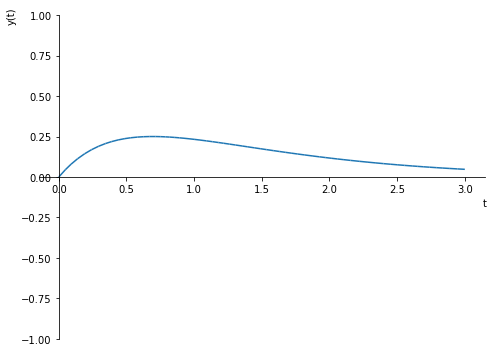

In [ ]:
p = sp.plot(y, (t, 0, 3), ylim= (-1, 1), ylabel='y(t)',size=(7, 5))

Podemos também fazer um gráfico mais detalhado, como $y(t)$ é representado pela subtração de duas exponenciais, $y(t) = e^{-t}-e^{-2t}$, em uma única plotagem  podemos apresentar a exponencial $e^{-t}$, $-e^{-2t}$ e a função $y(t)$. Pra realizar essa operação se faz uso do arquivo `sp.extend()`.

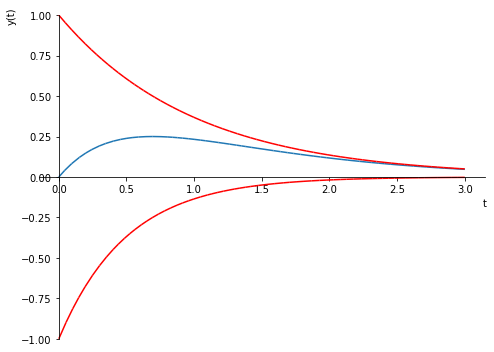

In [ ]:
p1 = sp.plot(sp.exp(-t), -sp.exp(-2*t), (t, 0, 3), line_color = 'red', show = False)
p.extend(p1)
p.show()

No argumento do `sp.plot` foi adicionado:
- As duas funções exponenciais a partir do arquivo `sp.exp()` da biblioteca `sympy`;
- A variação em $t$;
- Subcomando `line_color =' '`, que permite alterar a cor das funções no gráfico;
- Uma condição `show = False`, que impede a aparição do gráfico `p1` após compilar o código.

O comando `p.extend(p1)`, é o que permite que no gráfico `p` seja adicionado a plontagem `p1`, ou seja, vamos extrair os dados de `p1` e adicionar em `p`, ficando assim com 3 conjuntos de dados em nossa lista . Já o comando `p.show()` é o responsavel por permitir a aparição do gráfico na tela. 



# **Exemplo 02:** 
Circuitos RC são bastante utilizados para a filtragem de sinais em eletrônica.Engenheiros sabem que a resposta deste circuito a um impulso é dada por $$h(t)= \frac{3}{4}e^{-\frac{3t}{4}} u(t)$$
Determine a resposta deste circuito para o sinal $x(t)= 2\delta(t-1)+3e^{-2t}u(t)$.



In [ ]:
x=2*sp.DiracDelta(t-1)+3*sp.exp(-2*t)*sp.Heaviside(t)
x

2*DiracDelta(t - 1) + 3*exp(-2*t)

In [ ]:
h=(3/4)*sp.exp(-3*t/4)*sp.Heaviside(t)
h

0.75*exp(-3*t/4)

In [ ]:
x = x.subs(t, tau)
x

2*DiracDelta(tau - 1) + 3*exp(-2*tau)

In [ ]:
h = h.subs(t, t-tau)
h

0.75*exp(-3*t/4 + 3*tau/4)

In [ ]:
y = sp.integrate(x*h, (tau, 0, t))
y 

-1.8*exp(-2*t) + 1.5*exp(3/4)*exp(-3*t/4)*Heaviside(t - 1) + 1.8*exp(-3*t/4)

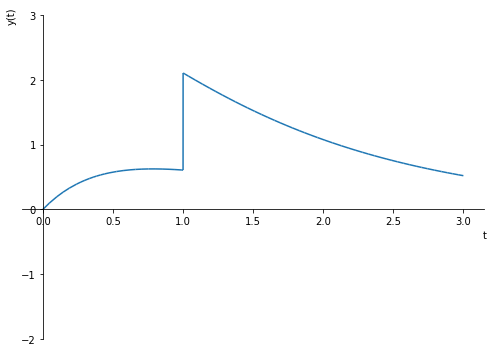

In [ ]:
p = sp.plot(y, (t, 0, 3), ylim= (-2, 3),  ylabel='y(t)', size=(7, 5))

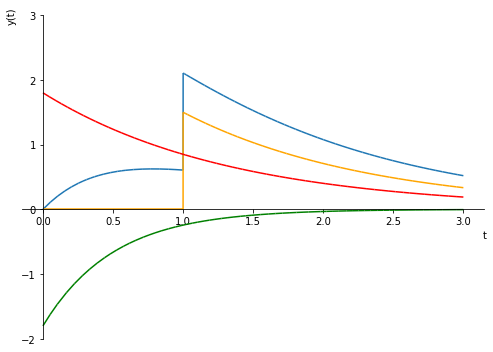

In [ ]:
um= -1.8*sp.exp(-2*t)
dois= 1.5*sp.exp(3/4)*sp.exp(-3*t/4)*sp.Heaviside(t-1)
tres=  1.8*sp.exp(-3*t/4)

p1 = sp.plot(um, dois, tres,  (t, 0, 3),show = False)
p1[0].line_color = 'green'
p1[1].line_color = 'orange'
p1[2].line_color = 'red'

p.extend(p1)
p.show()

Ao expressar cada componente de $y(t)$ graficamente, podemos definir a cor para cada uma delas de modo que se possa vizualizar melhor o gráfico. Para isso basta definir a cor de forma separada para cada conjunto de dados da lista. Se `line_color= ' '` for aplicado dentro do arguemento de `sp.plot()` de `p1` todas as componentes de $y(t)$ teram a mesma cor definida.